# THE SPARKS FOUNDATION: DATA SCIENCE AND BUSINESS ANALYTICS

## TASK 1: Prediction using Supervised ML
In this regression task, we will predict the percentage of marks that a student is expected to score based upon the number of hours they have studied. This is a simple linear regression task as it involves just two variables.

### STEP 1: Import the Dataset

## AUTHOR: Shivam Kumar Yadav

In [1]:
# Importing all the libraries required in this notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Reading data from remote link

url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)

print("Data Imported Successfully")
student_data

Data Imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# here we can see that how many rows and columns are there in the dataset

student_data.shape

(25, 2)

In [4]:
# describe perform some numerical calculations on the dataset

student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
# here we can see that there are no NULL values that can affect the training of our algorithm

student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### STEP 2: Visualize and Analyze the Dataset 

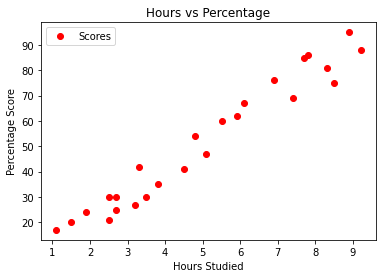

In [6]:
# Plotting the distribution of scoresamd number of hours studied on a 2D graph

student_data.plot(x='Hours', y='Scores', style='ro')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relationship between hours and percentage which means that as the number of hours studied increased, the percentage scored also increased.**

### STEP 3: Prepare the Data

In [7]:
# we are extracting values of Hours into variable X and the varlues of Scores into variable Y

X = student_data.iloc[:, :-1].values  
Y = student_data.iloc[:, 1].values

In [8]:
# Number of hours studied
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [9]:
# scores Obtained
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [10]:
# we now split this data into training and test sets by using Scikit-Learn's built-in train_test_split() method

from sklearn.model_selection import train_test_split  

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0)

In [11]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [12]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [13]:
Y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [14]:
Y_test

array([20, 27, 69, 30, 62], dtype=int64)

### STEP 4: Design and Train the Machine Learning Model

In [15]:
from sklearn.linear_model import LinearRegression  

regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

print("Training complete.")

Training complete.


### STEP 5: Visualize the Model 

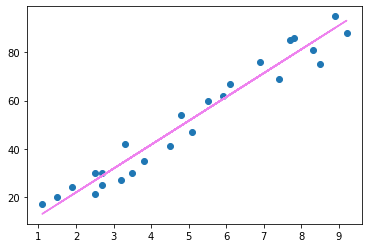

In [16]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line, color='violet');
plt.show()

### STEP 6: Make Predictions 

In [17]:
print(X_test) # Testing data - In Hours

Y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [18]:
# Comparing Actual vs Predicted

df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [19]:
# predicting the score, if a student studies for 9.25 hrs/ day

hours = 9.25
own_pred = regressor.predict([[hours]])
print(f"No of Hours = {hours}")
print(f"Predicted Score = {own_pred[0]}")

No of Hours = 9.25
Predicted Score = 93.69173248737538


### STEP 7: Evaluate the Model
It is important to evaluate the performance of algorithm to compare how well different algorithms perform on a particular dataset. We have chosen the mean absolute error and max error. There are many such metrics.

**Mean Absolute Error**

In [20]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error: 4.183859899002975


**Max Error**

In [21]:
print('Max Error: ', metrics.max_error(Y_test,Y_pred))

Max Error:  6.732260779489842
